### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.utils import resample

### IMPORT DATASET

In [2]:
df = pd.read_csv('project_data.csv')
df.head(5)

,Timestamp,State of Residence,Geo-Pol Zone (place of residence),What SIM Do You Use?,What Network Type is Your Sim?,Do You Make Calls?,"If Yes, How Strong is The Network in Your Area?",Do You Send Text Messages?,"If Yes, How Strong is The Network in Your Area?.1",Do You Browse The Internet?,"If Yes, How Strong is The Network in Your Area?.2","On a Scale of 0 to 5, Rate The Quality of Service You Experience While Using This Particular SIM.",Kindly Give a Quick Comment On This SIM's Quality of Service (Please Do Express Yourself Clearly).
0,2022/07/12 1:58:20 PM GMT+1,Ogun,South West,MTN,4G,Yes,5.0,Yes,5.0,Yes,5.0,5,Very good QoS from MTN's 4G in Ogun state
1,2022/07/12 1:59:30 PM GMT+1,Ondo,South West,MTN,4G,Yes,5.0,Yes,5.0,Yes,5.0,5,Very fast and enjoyable. MTN works great
2,2022/07/12 2:01:52 PM GMT+1,Enugu,South East,MTN,4G,Yes,5.0,Yes,5.0,Yes,5.0,5,Excellent network coverage from MTN's. very fa...
3,2022/07/12 2:05:43 PM GMT+1,Imo,South East,MTN,4G,Yes,3.0,Yes,3.0,Yes,3.0,3,MTN in IMO state is every poor. Too slow and o...
4,2022/07/12 2:07:22 PM GMT+1,Ogun,South West,Globacom,4G,Yes,5.0,Yes,5.0,Yes,4.0,5,Glo is very good over here. Browsing can be sl...


In [3]:
# Rename columns to reasonable nomenclatures

new_name = {
    "Geo-Pol Zone (place of residence)" : "Geopolitical_Zone",
    "What SIM Do You Use?" : "Sim",
    "What Network Type is Your Sim?" : "Network_Type",
    "Do You Make Calls?" : "Calls",
    "If Yes, How Strong is The Network in Your Area?" : "Call_Network_Strength",
    "Do You Send Text Messages?" : "Texts",
    "If Yes, How Strong is The Network in Your Area?.1" : "Text_Network_Strength",
    "Do You Browse The Internet?" : "Browse",
    "State of Residence " : "State",
    "If Yes, How Strong is The Network in Your Area?.2" : "Browse_Network_Strength",
    "On a Scale of 0 to 5, Rate The Quality of Service You Experience While Using This Particular SIM." : "Sentiment_Level",
    "Kindly Give a Quick Comment On This SIM's Quality of Service (Please Do Express Yourself Clearly)." : "Comment"
}

df = df.rename(new_name, axis = 1)
df.head(5)

,Timestamp,State,Geopolitical_Zone,Sim,Network_Type,Calls,Call_Network_Strength,Texts,Text_Network_Strength,Browse,Browse_Network_Strength,Sentiment_Level,Comment
0,2022/07/12 1:58:20 PM GMT+1,Ogun,South West,MTN,4G,Yes,5.0,Yes,5.0,Yes,5.0,5,Very good QoS from MTN's 4G in Ogun state
1,2022/07/12 1:59:30 PM GMT+1,Ondo,South West,MTN,4G,Yes,5.0,Yes,5.0,Yes,5.0,5,Very fast and enjoyable. MTN works great
2,2022/07/12 2:01:52 PM GMT+1,Enugu,South East,MTN,4G,Yes,5.0,Yes,5.0,Yes,5.0,5,Excellent network coverage from MTN's. very fa...
3,2022/07/12 2:05:43 PM GMT+1,Imo,South East,MTN,4G,Yes,3.0,Yes,3.0,Yes,3.0,3,MTN in IMO state is every poor. Too slow and o...
4,2022/07/12 2:07:22 PM GMT+1,Ogun,South West,Globacom,4G,Yes,5.0,Yes,5.0,Yes,4.0,5,Glo is very good over here. Browsing can be sl...


In [4]:
data = df[["State", "Geopolitical_Zone", "Sim", "Network_Type", "Calls", "Call_Network_Strength", 
         "Texts", "Text_Network_Strength", "Browse", "Browse_Network_Strength", "Sentiment_Level", "Comment"]]

data.head(5)

,State,Geopolitical_Zone,Sim,Network_Type,Calls,Call_Network_Strength,Texts,Text_Network_Strength,Browse,Browse_Network_Strength,Sentiment_Level,Comment
0,Ogun,South West,MTN,4G,Yes,5.0,Yes,5.0,Yes,5.0,5,Very good QoS from MTN's 4G in Ogun state
1,Ondo,South West,MTN,4G,Yes,5.0,Yes,5.0,Yes,5.0,5,Very fast and enjoyable. MTN works great
2,Enugu,South East,MTN,4G,Yes,5.0,Yes,5.0,Yes,5.0,5,Excellent network coverage from MTN's. very fa...
3,Imo,South East,MTN,4G,Yes,3.0,Yes,3.0,Yes,3.0,3,MTN in IMO state is every poor. Too slow and o...
4,Ogun,South West,Globacom,4G,Yes,5.0,Yes,5.0,Yes,4.0,5,Glo is very good over here. Browsing can be sl...


### Data Information 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    293 non-null    object 
 1   Geopolitical_Zone        293 non-null    object 
 2   Sim                      293 non-null    object 
 3   Network_Type             293 non-null    object 
 4   Calls                    293 non-null    object 
 5   Call_Network_Strength    289 non-null    float64
 6   Texts                    293 non-null    object 
 7   Text_Network_Strength    284 non-null    float64
 8   Browse                   293 non-null    object 
 9   Browse_Network_Strength  290 non-null    float64
 10  Sentiment_Level          293 non-null    int64  
 11  Comment                  293 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 27.6+ KB


In [6]:
data.shape

(293, 12)

In [7]:
data["Network_Type"].value_counts()

4G    206
3G     69
2G     13
5G      4
1G      1
Name: Network_Type, dtype: int64

In [8]:
data["State"].value_counts()

Lagos        66
Ondo         56
Ogun         34
Oyo          27
Abuja        20
Delta        18
Abia         14
Adamawa      12
Osun         11
Rivers        8
Enugu         7
Anambra       4
Ekiti         3
Akwa-Ibom     3
Edo           3
Imo           2
Bayelsa       1
Zamfara       1
Kano          1
Benue         1
Kwara         1
Name: State, dtype: int64

In [9]:
data["Geopolitical_Zone"].value_counts()

South West       198
South South       32
South East        27
North Central     22
North East        12
North West         2
Name: Geopolitical_Zone, dtype: int64

### Data Processing 

In [10]:
# Check Missing Values

data.isna().sum()

State                      0
Geopolitical_Zone          0
Sim                        0
Network_Type               0
Calls                      0
Call_Network_Strength      4
Texts                      0
Text_Network_Strength      9
Browse                     0
Browse_Network_Strength    3
Sentiment_Level            0
Comment                    0
dtype: int64

In [11]:
# Fill missing value

def fill_missing_value(df, feature, method):
    if method == 'mode':
        df[feature] = df[feature].fillna(df[feature].mode()[0])
    elif method == 'median':
        df[feature] = df[feature].fillna(df[feature].mode())
    else:
        df[feature] = df[feature].fillna(df[feature].mean())

In [12]:
features_missing = data.columns[data.isna().any()]

for feature in features_missing:
    fill_missing_value(data, feature = feature, method = 'mean')
    
data.isna().sum()

<ipython-input-11-e509ae17e895>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].fillna(df[feature].mean())


State                      0
Geopolitical_Zone          0
Sim                        0
Network_Type               0
Calls                      0
Call_Network_Strength      0
Texts                      0
Text_Network_Strength      0
Browse                     0
Browse_Network_Strength    0
Sentiment_Level            0
Comment                    0
dtype: int64

In [13]:
# Convert datatypes from float to int64

data = data.astype({"Call_Network_Strength" : "int64", "Text_Network_Strength" : "int64", "Browse_Network_Strength" : "int64"})
display(data.dtypes)

data.head(5)

State                      object
Geopolitical_Zone          object
Sim                        object
Network_Type               object
Calls                      object
Call_Network_Strength       int64
Texts                      object
Text_Network_Strength       int64
Browse                     object
Browse_Network_Strength     int64
Sentiment_Level             int64
Comment                    object
dtype: object

,State,Geopolitical_Zone,Sim,Network_Type,Calls,Call_Network_Strength,Texts,Text_Network_Strength,Browse,Browse_Network_Strength,Sentiment_Level,Comment
0,Ogun,South West,MTN,4G,Yes,5,Yes,5,Yes,5,5,Very good QoS from MTN's 4G in Ogun state
1,Ondo,South West,MTN,4G,Yes,5,Yes,5,Yes,5,5,Very fast and enjoyable. MTN works great
2,Enugu,South East,MTN,4G,Yes,5,Yes,5,Yes,5,5,Excellent network coverage from MTN's. very fa...
3,Imo,South East,MTN,4G,Yes,3,Yes,3,Yes,3,3,MTN in IMO state is every poor. Too slow and o...
4,Ogun,South West,Globacom,4G,Yes,5,Yes,5,Yes,4,5,Glo is very good over here. Browsing can be sl...


In [14]:
# Gather entries with small frequencies as a single entry

def shorten_entries(entries, threshold):
    entries_map = {}
    
    for i in range(len(entries)):
        if entries.values[i] >= threshold:
            entries_map[entries.index[i]] = entries.index[i]
        else:
            entries_map[entries.index[i]] = 'Other'
            
    return entries_map

In [15]:
network_type_map = shorten_entries(data.Network_Type.value_counts(), 5)
data["Network_Type"] = data["Network_Type"].map(network_type_map)

data.Network_Type.value_counts()

4G       206
3G        69
2G        13
Other      5
Name: Network_Type, dtype: int64

In [16]:
state_map = shorten_entries(data.State.value_counts(), 3)
data["State"] = data["State"].map(state_map)

data.State.value_counts()

Lagos        66
Ondo         56
Ogun         34
Oyo          27
Abuja        20
Delta        18
Abia         14
Adamawa      12
Osun         11
Rivers        8
Enugu         7
Other         7
Anambra       4
Akwa-Ibom     3
Edo           3
Ekiti         3
Name: State, dtype: int64

In [17]:
geo_pol_map = shorten_entries(data.Geopolitical_Zone.value_counts(), 3)
data["Geopolitical_Zone"] = data["Geopolitical_Zone"].map(geo_pol_map)

data.Geopolitical_Zone.value_counts()

South West       198
South South       32
South East        27
North Central     22
North East        12
Other              2
Name: Geopolitical_Zone, dtype: int64

### Feature Engineering 

Objective:

- create new column "Query" by adding available columns [State, Geopolitical_Zone, Sim, Network_Type, Comment].

In [18]:
feature_df = data.copy()

In [19]:
feature_df = feature_df[[ "State", "Geopolitical_Zone", "Sim", "Network_Type", "Sentiment_Level", "Comment"]]
feature_df.head(3)

,State,Geopolitical_Zone,Sim,Network_Type,Sentiment_Level,Comment
0,Ogun,South West,MTN,4G,5,Very good QoS from MTN's 4G in Ogun state
1,Ondo,South West,MTN,4G,5,Very fast and enjoyable. MTN works great
2,Enugu,South East,MTN,4G,5,Excellent network coverage from MTN's. very fa...


In [20]:
feature_df["Query"] = feature_df[[ "State", "Geopolitical_Zone", "Sim", "Network_Type", "Comment"]].apply(lambda x: " ".join(x), axis = 1)

feature_df.head(3)

,State,Geopolitical_Zone,Sim,Network_Type,Sentiment_Level,Comment,Query
0,Ogun,South West,MTN,4G,5,Very good QoS from MTN's 4G in Ogun state,Ogun South West MTN 4G Very good QoS from MTN'...
1,Ondo,South West,MTN,4G,5,Very fast and enjoyable. MTN works great,Ondo South West MTN 4G Very fast and enjoyable...
2,Enugu,South East,MTN,4G,5,Excellent network coverage from MTN's. very fa...,Enugu South East MTN 4G Excellent network cove...


In [21]:
sentiment_dict = {
    5 : 'Excellent',
    4 : 'Very Good',
    3 : 'Good',
    2 : 'Average',
    1 : 'Bad',
    0 : 'Poor'
}

feature_df['Sentiment'] = feature_df['Sentiment_Level'].map(sentiment_dict)
feature_df.head(5)

,State,Geopolitical_Zone,Sim,Network_Type,Sentiment_Level,Comment,Query,Sentiment
0,Ogun,South West,MTN,4G,5,Very good QoS from MTN's 4G in Ogun state,Ogun South West MTN 4G Very good QoS from MTN'...,Excellent
1,Ondo,South West,MTN,4G,5,Very fast and enjoyable. MTN works great,Ondo South West MTN 4G Very fast and enjoyable...,Excellent
2,Enugu,South East,MTN,4G,5,Excellent network coverage from MTN's. very fa...,Enugu South East MTN 4G Excellent network cove...,Excellent
3,Other,South East,MTN,4G,3,MTN in IMO state is every poor. Too slow and o...,Other South East MTN 4G MTN in IMO state is ev...,Good
4,Ogun,South West,Globacom,4G,5,Glo is very good over here. Browsing can be sl...,Ogun South West Globacom 4G Glo is very good o...,Excellent


In [22]:
model_df = feature_df.copy()
model_df.head(3)

,State,Geopolitical_Zone,Sim,Network_Type,Sentiment_Level,Comment,Query,Sentiment
0,Ogun,South West,MTN,4G,5,Very good QoS from MTN's 4G in Ogun state,Ogun South West MTN 4G Very good QoS from MTN'...,Excellent
1,Ondo,South West,MTN,4G,5,Very fast and enjoyable. MTN works great,Ondo South West MTN 4G Very fast and enjoyable...,Excellent
2,Enugu,South East,MTN,4G,5,Excellent network coverage from MTN's. very fa...,Enugu South East MTN 4G Excellent network cove...,Excellent


In [23]:
model_df = model_df[["State", "Geopolitical_Zone", "Sim", "Network_Type", "Sentiment_Level", "Comment", "Query", "Sentiment"]]
model_df.head(3)

,State,Geopolitical_Zone,Sim,Network_Type,Sentiment_Level,Comment,Query,Sentiment
0,Ogun,South West,MTN,4G,5,Very good QoS from MTN's 4G in Ogun state,Ogun South West MTN 4G Very good QoS from MTN'...,Excellent
1,Ondo,South West,MTN,4G,5,Very fast and enjoyable. MTN works great,Ondo South West MTN 4G Very fast and enjoyable...,Excellent
2,Enugu,South East,MTN,4G,5,Excellent network coverage from MTN's. very fa...,Enugu South East MTN 4G Excellent network cove...,Excellent


### Check Data Imbalance 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'sentiment score')

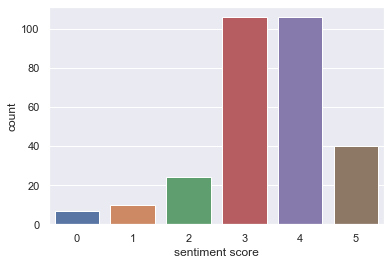

In [24]:
# ChecK Target Distribution

ax = sns.countplot(model_df.Sentiment_Level)
plt.xlabel('sentiment score')

In [25]:
# To Upsample Target


#create two dataframes for majority and minorit class
data_maj = model_df[(model_df['Sentiment_Level'] == 4)]
data_min0 = model_df[(model_df['Sentiment_Level'] == 0)]
data_min1 = model_df[(model_df['Sentiment_Level'] == 1)]
data_min2 = model_df[(model_df['Sentiment_Level'] == 2)]
data_min3 = model_df[(model_df['Sentiment_Level'] == 3)]
data_min5 = model_df[(model_df['Sentiment_Level'] == 5)]

#upsample minority class
data_up0 = resample(data_min0, replace = True, n_samples = 1000, random_state = 42)
data_up1 = resample(data_min1, replace = True, n_samples = 1000, random_state = 42)
data_up2 = resample(data_min2, replace = True, n_samples = 1000, random_state = 42)
data_up3 = resample(data_min3, replace = True, n_samples = 1000, random_state = 42)
data_up4 = resample(data_maj, replace = True, n_samples = 1000, random_state = 42)
data_up5 = resample(data_min5, replace = True, n_samples = 1000, random_state = 42)

#combine upsampled class and majority class
new_model_df = pd.concat([data_up0, data_up1, data_up2, data_up3, data_up5, data_up4])
new_model_df.head(5)

,State,Geopolitical_Zone,Sim,Network_Type,Sentiment_Level,Comment,Query,Sentiment
280,Adamawa,North East,9mobile,2G,0,Very bad network,Adamawa North East 9mobile 2G Very bad network,Poor
268,Abuja,North Central,9mobile,2G,0,"I would give this network a 0 today, tomorrow ...",Abuja North Central 9mobile 2G I would give th...,Poor
274,Adamawa,North East,Globacom,2G,0,Very poor. Do not use!!,Adamawa North East Globacom 2G Very poor. Do n...,Poor
280,Adamawa,North East,9mobile,2G,0,Very bad network,Adamawa North East 9mobile 2G Very bad network,Poor
256,Abia,South East,9mobile,2G,0,This is the poorest network service using prov...,Abia South East 9mobile 2G This is the poorest...,Poor


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'sentiment score')

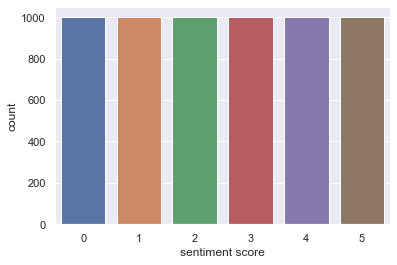

In [26]:
ax = sns.countplot(new_model_df.Sentiment_Level)
plt.xlabel('sentiment score')

In [27]:
new_model_df.shape

(6000, 8)

In [28]:
def to_sentiment(sentiment):
  sentiment = int(sentiment)

  if sentiment <= 2:
    return 0
  else:
    return 1
    
new_model_df['Sentiment_Group'] = new_model_df.Sentiment_Level.apply(to_sentiment)
new_model_df['Sentiment_Group'].nunique()

2

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


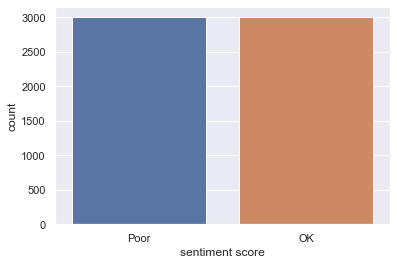

In [29]:
class_names = ['Poor', 'OK']
ax = sns.countplot(new_model_df.Sentiment_Group)
plt.xlabel('sentiment score')
ax.set_xticklabels(class_names);

In [30]:
new_model_df.head(10)

,State,Geopolitical_Zone,Sim,Network_Type,Sentiment_Level,Comment,Query,Sentiment,Sentiment_Group
280,Adamawa,North East,9mobile,2G,0,Very bad network,Adamawa North East 9mobile 2G Very bad network,Poor,0
268,Abuja,North Central,9mobile,2G,0,"I would give this network a 0 today, tomorrow ...",Abuja North Central 9mobile 2G I would give th...,Poor,0
274,Adamawa,North East,Globacom,2G,0,Very poor. Do not use!!,Adamawa North East Globacom 2G Very poor. Do n...,Poor,0
280,Adamawa,North East,9mobile,2G,0,Very bad network,Adamawa North East 9mobile 2G Very bad network,Poor,0
256,Abia,South East,9mobile,2G,0,This is the poorest network service using prov...,Abia South East 9mobile 2G This is the poorest...,Poor,0
274,Adamawa,North East,Globacom,2G,0,Very poor. Do not use!!,Adamawa North East Globacom 2G Very poor. Do n...,Poor,0
274,Adamawa,North East,Globacom,2G,0,Very poor. Do not use!!,Adamawa North East Globacom 2G Very poor. Do n...,Poor,0
280,Adamawa,North East,9mobile,2G,0,Very bad network,Adamawa North East 9mobile 2G Very bad network,Poor,0
176,Oyo,South West,MTN,4G,0,In all network mtn is the best,Oyo South West MTN 4G In all network mtn is th...,Poor,0
256,Abia,South East,9mobile,2G,0,This is the poorest network service using prov...,Abia South East 9mobile 2G This is the poorest...,Poor,0


In [34]:
new_model_df['Sentiment'].unique()

array(['Poor', 'Bad', 'Average', 'Good', 'Excellent', 'Very Good'],
      dtype=object)

In [35]:
# neww_model_df = new_model_df[["State", "Geopolitical_Zone", "Sim", "Network_Type", "Sentiment_Level", "Sentiment_Group"]]

# neww_model_df = pd.get_dummies(neww_model_df)
# neww_model_df.head(5)

In [36]:
# newww_model_df = neww_model_df.join(new_model_df.Sentiment)
# newww_model_df

In [37]:
new_model_df = new_model_df[["Query", "Sentiment_Level"]]
new_model_df.head(3)

,Query,Sentiment_Level
280,Adamawa North East 9mobile 2G Very bad network,0
268,Abuja North Central 9mobile 2G I would give th...,0
274,Adamawa North East Globacom 2G Very poor. Do n...,0


In [38]:
new_model_df.to_csv('propoint_sentiment_df.csv')